In [1]:
# CELL 1

import pandas as pd
import random
import math
import statistics
import operator

def loadDataset(url, split):
	trainingSet=[]
	testSet=[]
	df = pd.read_csv(url, header=None)
	array = df.to_numpy()
	random.shuffle(array)
	training_len = int(len(array)*split)
	trainingSet = array[:training_len]
	testSet = array[training_len:]
	return trainingSet, testSet


def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])      
	return neighbors

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0
	
def knnIris(kValue, split):
	# prepare data
	trainingSet=[]
	testSet=[]
	url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
	trainingSet, testSet = loadDataset(url, split)
	# print('Train set: ' + repr(len(trainingSet)))
	# print('Test set: ' + repr(len(testSet)))
	# generate predictions
	predictions = []
	# loop through testSet
	for x in range(len(testSet)):
		# TODO starts here
		# get neighor between current test record and all training datasets
		neighbors = getNeighbors(trainingSet, testSet[x], kValue)
		# get response
		result = getResponse(neighbors)
		# append current prediction result to predictions list
		predictions.append(result)
		# TODO ends here
		del neighbors[:]
	accuracy = getAccuracy(testSet, predictions)
	# print(repr(kValue) + ' Accuracy: ' + repr(accuracy) + '%')
	del predictions[:]
	return accuracy

/home/wqb/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
# CELL 2

def knnMain(split):
	k_list = []
	accuracy_list = []
	for x in range(1, 6):
		for k in range(1,21):
			if k > len(k_list):
				k_list.append(k)
				accuracy_list.append(knnIris(k, split))
			elif k < len(k_list):
				accuracy_list[k] += knnIris(k, split)
	for k in range(len(k_list)):
		accuracy_list[k] /= 5
        
	overall_accuracy = statistics.mean(accuracy_list)
	return k_list, accuracy_list, overall_accuracy

Overall Accuracy: 75.88
Maximum Accuracy: 83.6 at k = 5


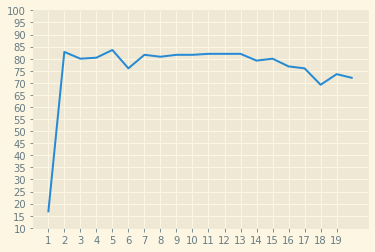

In [9]:
# CELL 3

import matplotlib.pyplot as plt
import numpy as np

k_list, accuracy_list, overall_accuracy = knnMain(0.67)
print("Overall Accuracy: " + repr(overall_accuracy))
print("Maximum Accuracy: " + repr(max(accuracy_list)) + " at k = " + repr(k_list[accuracy_list.index(max(accuracy_list))]))

plt.style.use('Solarize_Light2')
plt.plot(k_list,accuracy_list);

plt.xticks(np.arange(min(k_list), max(k_list), 1.0));
plt.yticks(np.arange(round(min(accuracy_list), -1) - 10, 101, 5.0));